<a href="https://colab.research.google.com/github/abhirockraj1/DataAnalysis/blob/main/LinearRegg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets --upgrade --quiet

In [47]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam,SGD
import pandas as pd
import os
import opendatasets as od
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [4]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/mikhail1681/walmart-sales'
# Using opendatasets let's download the data sets
od.download(dataset )

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rajabhi1
Your Kaggle Key: ··········


100%|██████████| 122k/122k [00:00<00:00, 40.3MB/s]

In [7]:
df = pd.read_csv("/content/walmart-sales/Walmart_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
## Converting the date col to pd datetime
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [10]:
#Extracting extra features from the present df like year, month, month_name, day, dayofWeek, dayname, week, quater
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['week'] = df['Date'].dt.isocalendar().week
df['quater'] = df['Date'].dt.quarter

In [11]:
df.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,week,quater
0,1,2010-02-05,1643690.9,0,42.31,2.572,211.096358,8.106,2010,2,5,5,1


In [13]:
X = df[['Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','year','month','day','week','quater']]
y = df['Unemployment']
X.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,year,month,day,week,quater
0,1643690.90,0,42.31,2.572,211.096358,2010,2,5,5,1
1,1641957.44,1,38.51,2.548,211.242170,2010,2,12,6,1
2,1611968.17,0,39.93,2.514,211.289143,2010,2,19,7,1
3,1409727.59,0,46.63,2.561,211.319643,2010,2,26,8,1
4,1554806.68,0,46.50,2.625,211.350143,2010,3,5,9,1


In [15]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,  random_state=104,  test_size=0.25, shuffle=True)

In [109]:
#Defining the X,w and y for tf malupulation
y = tf.constant(y_train,dtype=tf.float32)
y = tf.reshape(y, [y_train.shape[0],1])
x = tf.constant(tf.concat([X_train, tf.ones([X_train.shape[0], 1], tf.float32)], 1))
w = tf.Variable(tf.random.uniform(shape=[x.shape[1],1], maxval=0, dtype=tf.float32, seed=431))
print(x.shape)
print(y.shape)
print(w.shape)
print(w)

(4826, 11)
(4826, 1)
(11, 1)
<tf.Variable 'Variable:0' shape=(11, 1) dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>


In [110]:
alpha =0.01
opti= Adam(learning_rate=alpha)
iter =500
c=[]
for i in range(iter):
    with tf.GradientTape() as tape:
        #mean normalised yhat
        yhat = tf.matmul(x, w)

        cost = tf.math.pow((yhat-y),2)/y.shape[0]

    c.append(tf.reduce_sum(cost)/y.shape[0])
    grad = tape.gradient(cost,[w])
    opti.apply_gradients(zip(grad,[w])) # adam optimizer

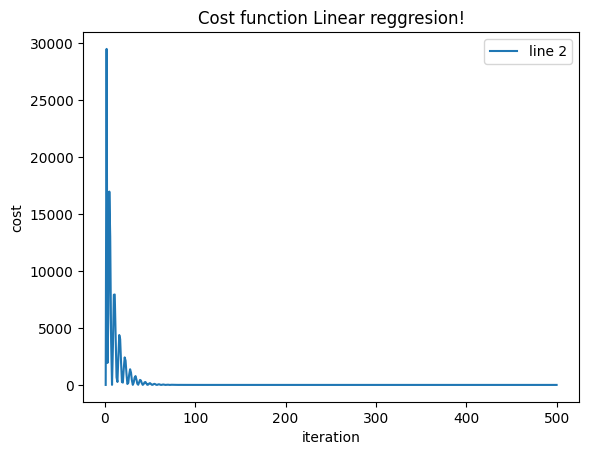

In [111]:
# plotting the cost function for LR confermation
l=np.arange(1,len(c)+1)
plt.plot(l, c, label = "line 2")

# naming the x axis
plt.xlabel('iteration')
# naming the y axis
plt.ylabel('cost')
# giving a title to my graph
plt.title('Cost function Linear reggresion!')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

In [130]:
xTest = tf.constant(tf.concat([X_test, tf.ones([X_test.shape[0], 1], tf.float32)], 1))
ypred = tf.matmul(xTest, w)
print(ypred.shape)
y_test = tf.reshape(y_test, [y_test.shape[0],1])
print(y_test.shape)
print(xTest.shape)

(1609, 1)
(1609, 1)
(1609, 11)


1609


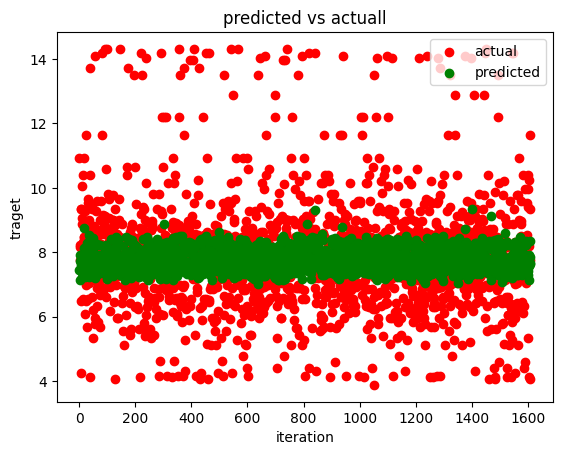

In [128]:
l1 = np.arange(1,y_test.shape[0]+1)
print(y_test[0:].shape[0])
plt.scatter(l1, y_test[0:], color='r',label = "actual")
plt.scatter(l1,ypred[0:],color='g',label="predicted" )
# naming the x axis
plt.xlabel('iteration')
# naming the y axis
plt.ylabel('traget')
# giving a title to my graph
plt.title('predicted vs actuall')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

In [131]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, ypred)
mse = metrics.mean_squared_error(y_test, ypred)
# r2 = metrics.r2_score(y_test, ypred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
# print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 1.3580621286372059
MSE is 3.6477965159639165


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_predicted = model.predict(X_test)

In [132]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
# r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
# print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 1.1506635792445548
MSE is 2.555902220614467


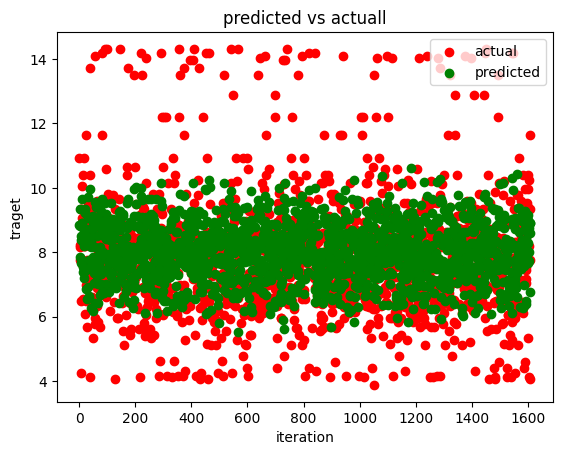

In [129]:
l1 = np.arange(1,y_predicted.shape[0]+1)
# print(y_test[0:].shape[0])
plt.scatter(l1, y_test, color='r',label = "actual")
plt.scatter(l1,y_predicted,color='g',label="predicted" )
# naming the x axis
plt.xlabel('iteration')
# naming the y axis
plt.ylabel('traget')
# giving a title to my graph
plt.title('predicted vs actuall')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()